# Collaborative filtering based recommender system:
### predicting what users will like based on their similarity to other users.

In [729]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [730]:
rating_df = pd.read_csv('animelist.csv')
rating_df.head()

,user_id,anime_id,rating,watching_status,watched_episodes
0,0,67,9,1,1
1,0,6702,7,1,4
2,0,242,10,1,4
3,0,4898,0,1,1
4,0,21,10,1,0


In [731]:
#we don't need watching status, watched episodes features

rating_df.drop(['watching_status', 'watched_episodes'], axis = 1, inplace = True)

In [732]:
rating_df.tail()

,user_id,anime_id,rating
109224742,353404,507,7
109224743,353404,392,9
109224744,353404,882,6
109224745,353404,883,8
109224746,353404,149,0


In [733]:
# we consider a rating from a user only if the user rated atleast 500 anime

user_rating_count = rating_df['user_id'].value_counts()
rating_df = rating_df[rating_df['user_id'].isin(user_rating_count[user_rating_count >= 500].index)]
len(rating_df)

26135608

In [734]:
rating_df.head()

,user_id,anime_id,rating
3988,17,34572,0
3989,17,2994,0
3990,17,40852,0
3991,17,41694,0
3992,17,40530,0


In [735]:
#Scale the rating between (0, 1)
minR = min(rating_df['rating'])
maxR = max(rating_df['rating'])
rating_df['rating'] = rating_df['rating'].apply(lambda x: (x- minR)/(maxR-minR)).values.astype(np.float64)

avg = np.mean(rating_df['rating'])
avg

0.3715405970276261

In [736]:
#Let's see the top ratings given by top users:

#number of ratings given by each user:
user_rank = rating_df.groupby('user_id')['rating'].count()

#drop missing values and take top (descending order) 20 users
top_users = user_rank.dropna().sort_values(ascending=False)[:20]

#ratings given by top ranked users on animes followed by the corresponding user's rank (the number of ratings given)
#does inner join and gives those top 20 users' ratings
top_r = rating_df.join(top_users, rsuffix='_ur', how='inner', on='user_id')

In [737]:
top_users

user_id
20807     17546
140590    17534
281232    17533
147331    17526
131988    17520
122341    17517
283786    17509
312302    17410
297931    17204
85472     16775
63900     16774
50485     16639
269633    16557
189037    15993
252520    15688
92529     15668
162615    15600
173716    15381
222150    15197
68042     14638
Name: rating, dtype: int64

In [738]:
top_r

,user_id,anime_id,rating,rating_ur
6334981,20807,8194,0.0,17546
6334982,20807,2225,0.0,17546
6334983,20807,13143,0.0,17546
6334984,20807,34572,1.0,17546
6334985,20807,34566,0.8,17546
...,...,...,...,...
96667639,312302,18967,0.0,17410
96667640,312302,13455,0.0,17410
96667641,312302,33390,0.0,17410
96667642,312302,42161,0.0,17410


In [739]:
#number of anime having more ratings in number
anime_rank = rating_df.groupby('anime_id')['rating'].count()

#top 20 rated animes (top means high count in ratings on anime)
top_animes = anime_rank.sort_values(ascending = False)[:20]

top_r = top_r.join(top_animes, rsuffix = '_ar', how='inner', on='anime_id')

In [740]:
anime_rank

anime_id
1        13397
5         8170
6        11294
7         5686
8         1296
         ...  
48481        2
48483       33
48488       78
48491       31
48492        2
Name: rating, Length: 17559, dtype: int64

In [741]:
top_animes

anime_id
6547     15681
11757    15588
16498    15570
9253     15555
4224     15541
5081     15318
1535     15305
19815    15180
1575     15138
6746     14978
5114     14936
10620    14911
15809    14887
30276    14854
20507    14830
2001     14805
9989     14777
849      14754
226      14724
14741    14657
Name: rating, dtype: int64

In [742]:
#now this is the table of top 20 users rating on top 20 animes
top_r

,user_id,anime_id,rating,rating_ur,rating_ar
6335148,20807,6547,1.0,17546,15681
15537407,50485,6547,1.0,16639,15681
19786865,63900,6547,0.0,16774,15681
21008413,68042,6547,0.7,14638,15681
26368332,85472,6547,1.0,16775,15681
...,...,...,...,...,...
83297604,269633,4224,0.0,16557,15541
86986430,281232,4224,0.0,17533,15541
87794789,283786,4224,0.5,17509,15541
92237251,297931,4224,0.0,17204,15541


In [743]:
#aggfunc doesn't matter since the user_ids are not repeted.
#if the user_id is repeated then the aggfunc will apply the functionon the values of same user_id , be it sum or mean
pd.crosstab(top_r.user_id, top_r.anime_id, top_r.rating, aggfunc = np.mean)

anime_id,226,849,1535,1575,2001,4224,5081,5114,6547,6746,9253,9989,10620,11757,14741,15809,16498,19815,20507,30276
user_id,,,,,,,,,,,,,,,,,,,,
20807,1.0,0.7,1.0,1.0,1.0,1.0,0.9,1.0,1.0,1.0,1.0,0.9,1.0,1.0,0.8,0.8,1.0,1.0,1.0,1.0
50485,0.0,1.0,0.6,1.0,1.0,1.0,1.0,1.0,1.0,0.9,1.0,0.9,0.6,1.0,0.9,1.0,0.9,1.0,1.0,0.8
63900,0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.0,0.8,0.0,0.8,0.8
68042,0.8,0.9,1.0,0.9,1.0,0.9,1.0,0.9,0.7,0.8,0.9,0.8,0.4,0.4,0.7,0.6,0.9,0.3,0.2,0.9
85472,0.7,0.8,0.0,0.0,1.0,0.9,0.0,0.0,1.0,0.0,0.8,0.0,0.8,0.9,0.7,0.8,0.8,0.7,0.7,0.9
92529,0.9,0.9,0.9,1.0,1.0,0.8,0.0,0.9,0.9,0.0,1.0,0.0,0.8,0.9,0.0,0.8,0.9,0.9,0.8,1.0
122341,0.2,0.7,0.3,0.2,0.7,0.3,0.3,0.8,0.5,0.6,0.7,0.3,0.2,0.1,0.2,0.3,0.1,0.4,0.4,0.6
131988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140590,0.3,0.8,0.6,0.5,0.8,0.8,0.8,0.9,0.5,0.8,0.9,0.7,0.3,0.4,0.6,0.6,0.5,0.7,0.7,0.7


In [840]:
#Data Preprocessing

user_ids = rating_df.user_id.sort_values().unique().tolist()


In [745]:
#since we have user_id which is not in sequence, let's consider them as unique ID and
#we will encode it to numbers

#here dictionary as {user_id : encoded value}
user_to_encoded = {x:i for i,x in enumerate(user_ids)}

#here dictionary as {encoded value: user_id}
encoded_to_user = {i:x for i, x in enumerate(user_ids)}

rating_df['user'] = rating_df['user_id'].map(user_to_encoded)

n_users = len(user_to_encoded)

print(f'we have {n_users} unique users')

rating_df

we have 16636 unique users


,user_id,anime_id,rating,user
3988,17,34572,0.0,0
3989,17,2994,0.0,0
3990,17,40852,0.0,0
3991,17,41694,0.0,0
3992,17,40530,0.0,0
...,...,...,...,...
109223237,353395,969,0.0,16635
109223238,353395,546,0.0,16635
109223239,353395,547,0.0,16635
109223240,353395,156,0.0,16635


In [746]:
#we shall do the same with all animes: we give unique id for each anime

anime_ids = rating_df['anime_id'].unique().tolist()

# dictionary as {anime_id: encoded value}
anime_to_encoded = {x:i for i,x in enumerate(anime_ids)}

# dictionary as {encoded value : anime_id}
encoded_to_anime = {i:x for i,x in enumerate(anime_ids)}

n_animes = len(anime_ids)

rating_df['anime'] = rating_df['anime_id'].map(anime_to_encoded)

print(f'we have {n_animes} unique animes')

rating_df

we have 17559 unique animes


,user_id,anime_id,rating,user,anime
3988,17,34572,0.0,0,0
3989,17,2994,0.0,0,1
3990,17,40852,0.0,0,2
3991,17,41694,0.0,0,3
3992,17,40530,0.0,0,4
...,...,...,...,...,...
109223237,353395,969,0.0,16635,1174
109223238,353395,546,0.0,16635,4618
109223239,353395,547,0.0,16635,11929
109223240,353395,156,0.0,16635,4889


In [747]:
#randomize/shuffle the data, frac = 1 i.e. shuffle entire dataset

rating_df = rating_df.sample(frac=1, random_state = 42)

#since we need numpy arrays we use .values to pandas df
X = rating_df[['user', 'anime']].values
y = rating_df['rating']

In [748]:
#save 10k for test data 
# from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = X[10000:], X[:10000], y[10000:], y[:10000]

print((len(X_train), len(y_train)), (len(X_test), len(y_test)))

(26125608, 26125608) (10000, 10000)


In [749]:
X_train[0]

array([9626, 1164])

In [750]:
#we consider 2 features vectors to pass to neural network

X_train_tensor = [X_train[:,0], X_train[:, 1]]
X_test_tensor = [X_test[:,0], X_test[:, 1]]

In [751]:
#Feature vector 1
X_train_tensor[0]

array([ 9626, 10388,  3120, ..., 14832, 10282, 14747])

In [752]:
#Feature vector 2
X_train_tensor[1]

array([1164,  619,   30, ..., 1019, 6659, 4040])

In [753]:
# Accelerator check
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [754]:
def Recommender():
    embedding_size = 128
    
    user = tf.keras.layers.Input(name = 'user',
                                shape = [1])
    user_embedding = tf.keras.layers.Embedding(name = 'user_embedding',
                                              input_dim = n_users,
                                              output_dim = embedding_size)(user)
    
    anime = tf.keras.layers.Input(name = 'anime',
                                 shape = [1])
    anime_embedding = tf.keras.layers.Embedding(name = 'anime_embedding',
                                               input_dim = n_animes,
                                               output_dim = embedding_size)(anime)

    #calculate cosine similarity between users and animes
    x = tf.keras.layers.Dot(name = 'dot_product',
                           normalize = True,
                           axes = 2)([user_embedding, anime_embedding])
    
    x = tf.keras.layers.Flatten()(x)
    
    x = tf.keras.layers.Dense(1, kernel_initializer = 'he_normal')(x)
    
    x = tf.keras.layers.BatchNormalization()(x)
    
    x = tf.keras.layers.Activation('sigmoid')(x)
    
    model = Model(inputs = [user, anime], outputs = x)
    model.compile(loss = 'binary_crossentropy', metrics = ['mae', 'mse'], optimizer = 'Adam')
    
    return model


model = Recommender()

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 user (InputLayer)           [(None, 1)]                  0         []                            
                                                                                                  
 anime (InputLayer)          [(None, 1)]                  0         []                            
                                                                                                  
 user_embedding (Embedding)  (None, 1, 128)               2129408   ['user[0][0]']                
                                                                                                  
 anime_embedding (Embedding  (None, 1, 128)               2247552   ['anime[0][0]']               
 )                                                                                          

In [755]:
# ! pip install pydot
# ! pip install graphviz

In [756]:
from tensorflow.keras.utils import plot_model

plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


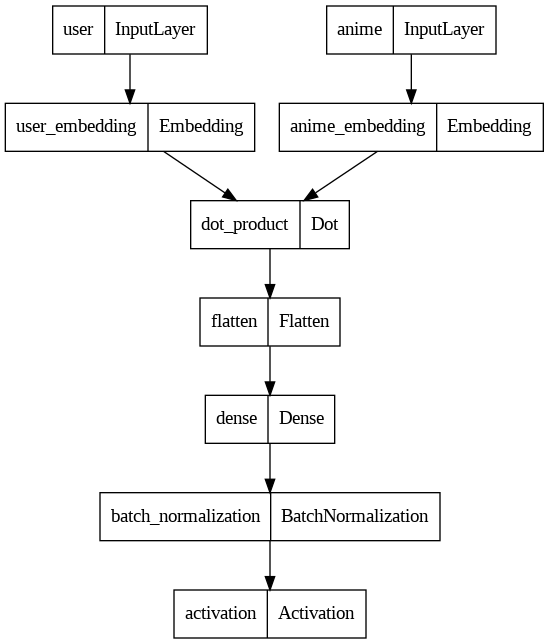

In [757]:
#setting callbacks 
# Callbacks in TensorFlow Keras provide a way to perform actions at various stages during training,
# such as saving model checkpoints, adjusting learning rates, visualizing training progress, and stopping training early if certain conditions are met.

from tensorflow.keras.callbacks import Callback, ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping, ReduceLROnPlateau


start_lr = 0.00001
min_lr = 0.00001
max_lr = 0.00005
batch_size = 10000
rampup_epochs = 5
sustain_epochs = 0
exp_decay = .8

def lrfn(epoch):
    if epoch < rampup_epochs:
        return (max_lr - start_lr)/rampup_epochs * epoch + start_lr
    elif epoch < rampup_epochs + sustain_epochs:
        return max_lr
    else:
        return (max_lr - min_lr) * exp_decay**(epoch-rampup_epochs-sustain_epochs) + min_lr


lr_callback = LearningRateScheduler(lambda epoch: lrfn(epoch), verbose=0)

checkpoint_filepath = './weights.h5'

model_checkpoints = ModelCheckpoint(filepath=checkpoint_filepath,
                                        save_weights_only=True,
                                        monitor='val_loss',
                                        mode='min',
                                        save_best_only=True)

early_stopping = EarlyStopping(patience = 3, monitor='val_loss', 
                               mode='min', restore_best_weights=True)


my_callbacks = [
    model_checkpoints,
    lr_callback,
    early_stopping,]

In [758]:
#traing the model

history = model.fit(
x = X_train_tensor,
y = y_train,
batch_size = batch_size,
epochs = 25,
verbose = 1,
validation_data = (X_test_tensor, y_test),
callbacks = my_callbacks)

model.load_weights(checkpoint_filepath)

Epoch 1/25
2613/2613 [==============================] - 90s 34ms/step - loss: 0.7992 - mae: 0.3828 - mse: 0.1981 - val_loss: 0.7995 - val_mae: 0.3851 - val_mse: 0.1990 - lr: 1.0000e-05
Epoch 2/25
2613/2613 [==============================] - 92s 35ms/step - loss: 0.7837 - mae: 0.3784 - mse: 0.1923 - val_loss: 0.7823 - val_mae: 0.3807 - val_mse: 0.1926 - lr: 1.8000e-05
Epoch 3/25
2613/2613 [==============================] - 89s 34ms/step - loss: 0.7481 - mae: 0.3652 - mse: 0.1780 - val_loss: 0.7247 - val_mae: 0.3565 - val_mse: 0.1690 - lr: 2.6000e-05
Epoch 4/25
2613/2613 [==============================] - 82s 31ms/step - loss: 0.6381 - mae: 0.3095 - mse: 0.1305 - val_loss: 0.5967 - val_mae: 0.2866 - val_mse: 0.1132 - lr: 3.4000e-05
Epoch 5/25
2613/2613 [==============================] - 82s 31ms/step - loss: 0.5648 - mae: 0.2650 - mse: 0.0984 - val_loss: 0.5535 - val_mae: 0.2574 - val_mse: 0.0945 - lr: 4.2000e-05
Epoch 6/25
2613/2613 [==============================] - 81s 31ms/step - los

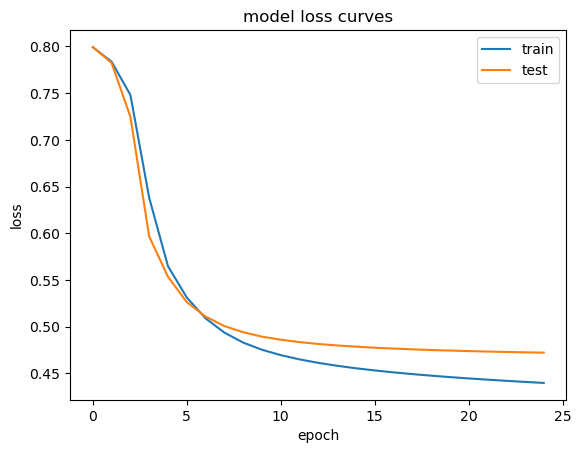

In [762]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss curves')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'])
plt.show()

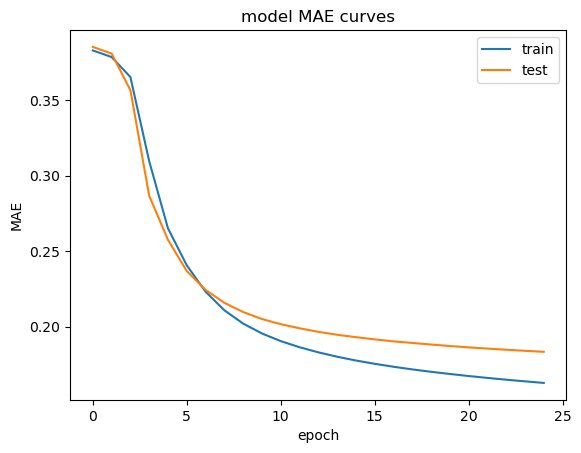

In [763]:

plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model MAE curves')
plt.xlabel('epoch')
plt.ylabel('MAE')
plt.legend(['train', 'test'])
plt.show()

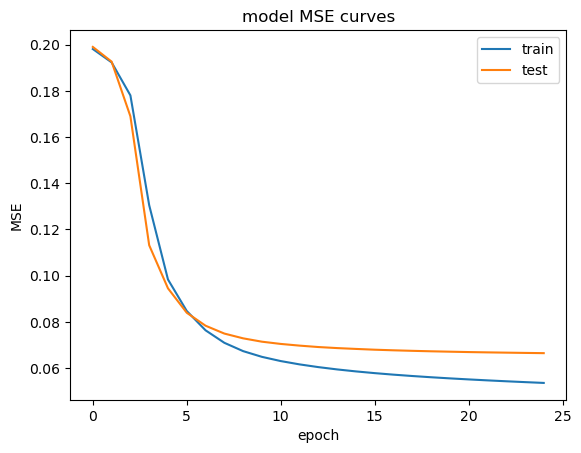

In [764]:

plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model MSE curves')
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.legend(['train', 'test'])
plt.show()

In [765]:
#Extracting weights from the model
def extract_weights(name, model):
    
    #gets the layer
    weight_layer = model.get_layer(name)
    
    #since the weights are in a list index is used to acces
    weights = weight_layer.get_weights()[0]
    
    #scale down the weights matrix by dividing with L2 norm (scalar division) of each respective record by reshaped norm-column vector
    weights = weights/np.linalg.norm(weights, axis = 1).reshape(-1,1)

    return weights

In [766]:
anime_weights = extract_weights('anime_embedding', model)
user_weights = extract_weights('user_embedding', model)

In [767]:
#shapes of weights are unaffected but, they are normalized
anime_weights.shape, user_weights.shape

((17559, 128), (16636, 128))

In [809]:
#We need names of animes so take them form anime.csv file

df = pd.read_csv('anime.csv')
df.head()


,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, Magic",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


In [810]:
df.Name.isna().sum()

0

In [811]:
# there are Unknown values in data so replace them with nan

df = df.replace("Unknown", np.nan)
# df.dropna(subset = ['Name'])

df

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",NaN,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, Magic",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17557,48481,Daomu Biji Zhi Qinling Shen Shu,NaN,"Adventure, Mystery, Supernatural",NaN,盗墓笔记之秦岭神树,ONA,NaN,"Apr 4, 2021 to ?",NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
17558,48483,Mieruko-chan,NaN,"Comedy, Horror, Supernatural",NaN,見える子ちゃん,TV,NaN,2021 to ?,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17559,48488,Higurashi no Naku Koro ni Sotsu,NaN,"Mystery, Dementia, Horror, Psychological, Supernatural, Thriller",Higurashi:When They Cry – SOTSU,ひぐらしのなく頃に卒,TV,NaN,"Jul, 2021 to ?",Summer 2021,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17560,48491,Yama no Susume: Next Summit,NaN,"Adventure, Slice of Life, Comedy",NaN,ヤマノススメ Next Summit,TV,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [812]:
df.columns

Index(['MAL_ID', 'Name', 'Score', 'Genres', 'English name', 'Japanese name',
       'Type', 'Episodes', 'Aired', 'Premiered', 'Producers', 'Licensors',
       'Studios', 'Source', 'Duration', 'Rating', 'Ranked', 'Popularity',
       'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1'],
      dtype='object')

In [813]:
# MAL_ID is my anime list ID which is same as anime_id

#get anime name if given anime_id

def getAnimeName(anime_id):
    try:
        #series object --> np array --> index value is anime name
        name = df[df['MAL_ID'] == anime_id]['English name'].values[0]
        
        #if there is no English name then return the official name (japanese name in english text)
        if name is np.nan:
            name = df[df['MAL_ID'] == anime_id]['Name'].values[0]
        return name
    #if the id is not available in the database catch the exception and return None 
    except:
        print('"Anime Not Found" :(\nplease check the input again')
        return None
    

In [814]:
#now we can get anime names by parsing anime_id
getAnimeName(4000)

'Cage'

In [815]:
df['English name'].isna().sum()

10565

In [816]:
# now we consider only required features in our dataframe

df = df[['MAL_ID','English name', 'Name', 'Score', 
         'Genres', 'Episodes', 'Type',
        'Premiered']]

In [817]:
#let's create an anime frame to quickly access the anime name and anime id if given the other

def getAnimeFrame(anime):
    if isinstance(anime, int):
        return df[df['MAL_ID'] == anime]
    if isinstance(anime, str):
        return df[df['English name'] == anime]

In [818]:
#we need to provide synopsis of the anime to the user
#I don't know why the file name is 'synopsis' but the feature name as 'sypnopsis'
synopsis_df = pd.read_csv('anime_with_synopsis.csv', usecols = ['MAL_ID', 'Name', 'Genres', 'sypnopsis'])

In [823]:
#Item based Recommendation

#to ensure the pandas data frame to display the full content on each cell

pd.set_option('max_colwidth', None)

def find_similar_animes(name:str, n = 5, neg = False):
#     try:
    #take out the anime_id (which is MAL_ID in anime.csv data) from anime name 
    index = df[df['English name'] == name]['MAL_ID'].values[0]

    #encode the index using our dictionary
    encoded_index = anime_to_encoded.get(index)


    #calculate the cosine similarity i.e. the weight vector projection of target anime on every other anime
    #so it will result a column vector of size equal to number of animes
    #the similarity score of the anime at respective index with the target (required) anime
    similarity = np.dot(anime_weights, anime_weights[encoded_index])


    #sort and return the indices based on similarity value
    #this result the animes index from most similar -- not related -- most dissimilar 
    sorted_anime_ids = np.argsort(similarity)

#     n=n+1


    print(f'animes closest to {name}')

    #we return the anime name, similarity score of the anime, genre and synopsis
    model_recommendations = []

    n+=1

    for en_anime_id in sorted_anime_ids[-n:-1]:


        #decode the en_anime_id to it's original form if of anime_id
        anime_id = encoded_to_anime.get(en_anime_id)


        #get anime name
        anime_name = df[df['MAL_ID'] == anime_id]['English name'].values[0]

        if pd.isnull(anime_name):
            continue

        #display calculated similarity 
        sim_score = similarity[en_anime_id]

        #get the synopsis of the anime from synopsis_df
        synopsis = synopsis_df[synopsis_df['MAL_ID'] == anime_id]['sypnopsis']

        #get the Genre
        genres = df[df['MAL_ID'] == anime_id].Genres.values[0]

        #get the score of the anime
        score = df[df['MAL_ID'] == anime_id].Score.values[0]

        model_recommendations.append({
            'anime name': anime_name,
            'anime rating':score, 
            'similarity':sim_score,
            'genre':genres,
            'synopsis':synopsis
        })



    #return model_recommendations
    result = pd.DataFrame(model_recommendations).sort_values(by = 'similarity', ascending = False)
    result.reset_index(drop = True, inplace = True)
    
    return result
#     except:
#         print(f'{name}!? Not found in anime list ')
#         return None

    
    

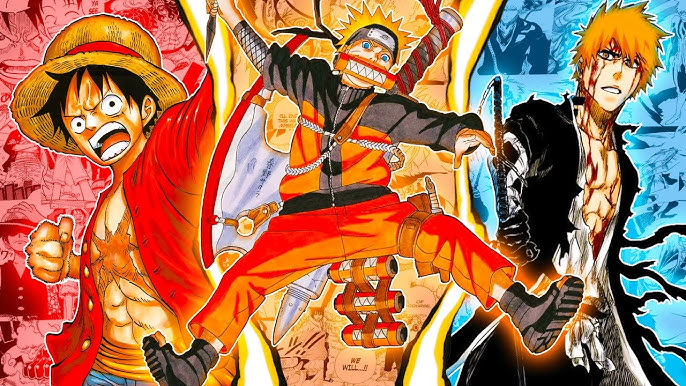

In [831]:
find_similar_animes('One Piece', n=5)

animes closest to One Piece


,anime name,anime rating,similarity,genre,synopsis
0,Naruto,7.91,0.764595,"Action, Adventure, Comedy, Super Power, Martial Arts, Shounen","10 oments prior to Naruto Uzumaki's birth, a huge demon known as the Kyuubi, the Nine-Tailed Fox, attacked Konohagakure, the Hidden Leaf Village, and wreaked havoc. In order to put an end to the Kyuubi's rampage, the leader of the village, the Fourth Hokage, sacrificed his life and sealed the monstrous beast inside the newborn Naruto. Now, Naruto is a hyperactive and knuckle-headed ninja still living in Konohagakure. Shunned because of the Kyuubi inside him, Naruto struggles to find his place in the village, while his burning desire to become the Hokage of Konohagakure leads him not only to some great new friends, but also some deadly foes. Name: sypnopsis, dtype: object"
1,Bleach,7.8,0.758485,"Action, Adventure, Comedy, Super Power, Supernatural, Shounen","237 Ichigo Kurosaki is an ordinary high schooler—until his family is attacked by a Hollow, a corrupt spirit that seeks to devour human souls. It is then that he meets a Soul Reaper named Rukia Kuchiki, who gets injured while protecting Ichigo's family from the assailant. To save his family, Ichigo accepts Rukia's offer of taking her powers and becomes a Soul Reaper as a result. However, as Rukia is unable to regain her powers, Ichigo is given the daunting task of hunting down the Hollows that plague their town. However, he is not alone in his fight, as he is later joined by his friends—classmates Orihime Inoue, Yasutora Sado, and Uryuu Ishida—who each have their own unique abilities. As Ichigo and his comrades get used to their new duties and support each other on and off the battlefield, the young Soul Reaper soon learns that the Hollows are not the only real threat to the human world. Name: sypnopsis, dtype: object"
2,Fairy Tail,7.68,0.733649,"Action, Adventure, Comedy, Magic, Fantasy, Shounen","4041 In the mystical land of Fiore, magic exists as an essential part of everyday life. Countless magic guilds lie at the core of all magical activity, and serve as venues for like-minded mages to band together and take on job requests. Among them, Fairy Tail stands out from the rest as a place of strength, spirit, and family. Lucy Heartfilia is a young mage searching for celestial gate keys, and her dream is to become a full-fledged wizard by joining this famous guild. In her search, she runs into Natsu Dragneel and his partner Happy, who are on a quest to find Natsu's foster father, the dragon Igneel. Upon being tricked by a man, Lucy falls under an abduction attempt, only to be saved by Natsu. To her shock, he reveals that he is a member of Fairy Tail and invites her to join them. There, Lucy meets the guild's strange members, such as the ice wizard Gray Fullbuster and magic swordswoman Erza Scarlet. Together as a family, they battle the forces of evil, help those in need, and gain new friends, all the while enjoying the never-ending adventure that is Fairy Tail. Name: sypnopsis, dtype: object"
3,Naruto:Shippuden,8.16,0.727072,"Action, Adventure, Comedy, Super Power, Martial Arts, Shounen","1508 It has been two and a half years since Naruto Uzumaki left Konohagakure, the Hidden Leaf Village, for intense training following events which fueled his desire to be stronger. Now Akatsuki, the mysterious organization of elite rogue ninja, is closing in on their grand plan which may threaten the safety of the entire shinobi world. Although Naruto is older and sinister events loom on the horizon, he has changed little in personality—still rambunctious and childish—though he is now far more confident and possesses an even greater determination to protect his friends and home. Come whatever may, Naruto will carry on with the fight for what is important to him, even at the expense of his own body, in the continuation of the saga about the boy who wishes to become Hokage. Name: sypnopsis, dtype: object"
4,Fullmetal Alchemist:Brotherhood,9.19,0.672678,"Act

# Hurrayyy! my model caught "THE BIG 3" right away !!

###### if you are wondering what Big 3 in anime:

###### One Piece, Naruto, Bleach are said to be Big 3, during the golden age of Shounen Jump Anime, three of them have worldwide popularity and length. Technically they are strongly corelated due to adventure, action, drama theme. The ML model was able to catch that corelation and recommended one for the other

# It's fun Let's try more !!!

In [839]:
find_similar_animes('Attack on Titan', n=5)

animes closest to Attack on Titan


,anime name,anime rating,similarity,genre,synopsis
0,One Punch Man,8.57,0.925030,"Action, Sci-Fi, Comedy, Parody, Super Power, Supernatural","9394 The seemingly ordinary and unimpressive Saitama has a rather unique hobby: being a hero. In order to pursue his childhood dream, he trained relentlessly for three years—and lost all of his hair in the process. Now, Saitama is incredibly powerful, so much so that no enemy is able to defeat him in battle. In fact, all it takes to defeat evildoers with just one punch has led to an unexpected problem—he is no longer able to enjoy the thrill of battling and has become quite bored. This all changes with the arrival of Genos, a 19-year-old cyborg, who wishes to be Saitama's disciple after seeing what he is capable of. Genos proposes that the two join the Hero Association in order to become certified heroes that will be recognized for their positive contributions to society, and Saitama, shocked that no one knows who he is, quickly agrees. And thus begins the story of One Punch Man , an action-comedy that follows an eccentric individual who longs to fight strong enemies that can hopefully give him the excitement he once felt and just maybe, he'll become popular in the process. Name: sypnopsis, dtype: object"
1,Death Note,8.63,0.921565,"Mystery, Police, Psychological, Supernatural, Thriller, Shounen","1336 shinigami, as a god of death, can kill any person—provided they see their victim's face and write their victim's name in a notebook called a Death Note. One day, Ryuk, bored by the shinigami lifestyle and interested in seeing how a human would use a Death Note, drops one into the human realm. High school student and prodigy Light Yagami stumbles upon the Death Note and—since he deplores the state of the world—tests the deadly notebook by writing a criminal's name in it. When the criminal dies immediately following his experiment with the Death Note, Light is greatly surprised and quickly recognizes how devastating the power that has fallen into his hands could be. With this divine capability, Light decides to extinguish all criminals in order to build a new world where crime does not exist and people worship him as a god. Police, however, quickly discover that a serial killer is targeting criminals and, consequently, try to apprehend the culprit. To do this, the Japanese investigators count on the assistance of the best detective in the world: a young and eccentric man known only by the name of L. Name: sypnopsis, dtype: object"
2,My Hero Academia,8.11,0.888106,"Action, Comedy, School, Shounen, Super Power","10097 The appearance of ""quirks,"" newly discovered super powers, has been steadily increasing over the years, with 80 percent of humanity possessing various abilities from manipulation of elements to shapeshifting. This leaves the remainder of the world completely powerless, and Izuku Midoriya is one such individual. Since he was a child, the ambitious middle schooler has wanted nothing more than to be a hero. Izuku's unfair fate leaves him admiring heroes and taking notes on them whenever he can. But it seems that his persistence has borne some fruit: Izuku meets the number one hero and his personal idol, All Might. All Might's quirk is a unique ability that can be inherited, and he has chosen Izuku to be his successor! Enduring many months of grueling training, Izuku enrolls in UA High, a prestigious high school famous for its excellent hero training program, and this year's freshmen look especially promising. With his bizarre but talented classmates and the looming threat of a villainous organization, Izuku will soon learn what it really means to be a hero. Name: sypnopsis, dtype: object"
3,"No Game, No Life",8.2,0.878002,"Game, Adventure, Comedy, Supernatural, Ecchi, Fantasy","7206 No Game No Life is a surreal comedy that follows Sora and Shiro, shut-in NEET siblings and the online gamer duo behind the legendary username ""Blank."" They view the real world as just another lousy g

<!-- ![image-2.png](attachment:image-2.png) -->
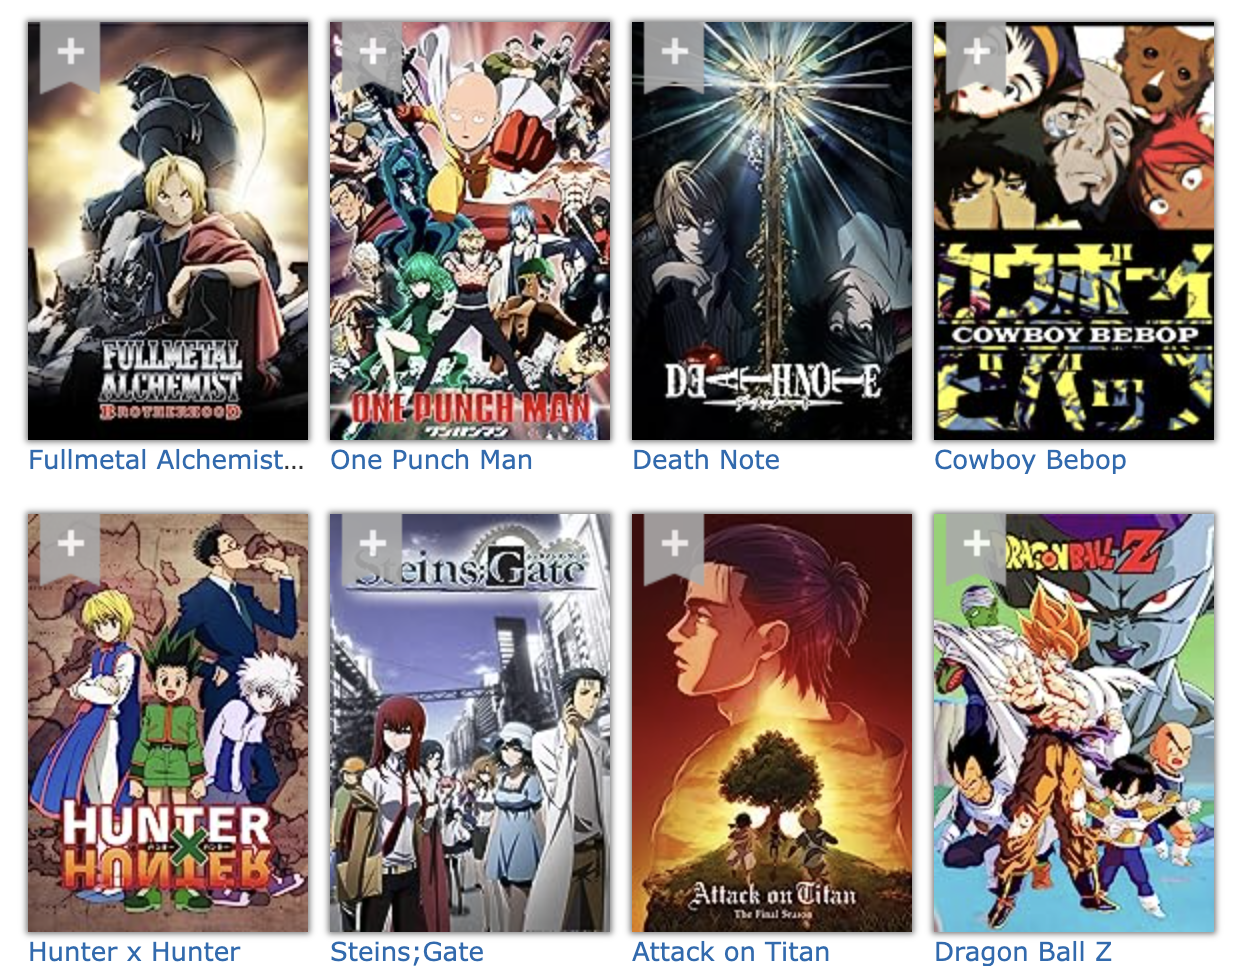


# Hurrayy !!! my model does it again.

##### The model just recommended IMDb's 3 top rated anime (Full metal Alchemist, One Punch man, Death Note) if given IMDb's top 6th high rated anime (Attack on Titan). The model found the corelattion between the ratings of the 